In [3]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [4]:
# Loading the dataset into a dataframe
airbnb = pd.read_csv("Airbnb_Open_Data.csv", low_memory=False)

In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [6]:
airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
id,102599.0,2.914623e+07,1.625751e+07,1.001254e+06,1.508581e+07,2.913660e+07,4.320120e+07,5.736742e+07
host id,102599.0,4.925411e+10,2.853900e+10,1.236005e+08,2.458333e+10,4.911774e+10,7.399650e+10,9.876313e+10
lat,102591.0,4.072809e+01,5.585652e-02,4.049979e+01,4.068874e+01,4.072229e+01,4.076276e+01,4.091697e+01
long,102591.0,-7.394964e+01,4.952126e-02,-7.424984e+01,-7.398258e+01,-7.395444e+01,-7.393235e+01,-7.370522e+01
Construction year,102385.0,2.012487e+03,5.765556e+00,2.003000e+03,2.007000e+03,2.012000e+03,2.017000e+03,2.022000e+03
minimum nights,102190.0,8.135845e+00,3.055378e+01,-1.223000e+03,2.000000e+00,3.000000e+00,5.000000e+00,5.645000e+03
number of reviews,102416.0,2.748374e+01,4.950895e+01,0.000000e+00,1.000000e+00,7.000000e+00,3.000000e+01,1.024000e+03
reviews per month,86720.0,1.374022e+00,1.746621e+00,1.000000e-02,2.200000e-01,7.400000e-01,2.000000e+00,9.000000e+01
review rate number,102273.0,3.279106e+00,1.284657e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
calculated host listings count,102280.0,7.936605e+00,3.221878e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.320000e+02


In [7]:
airbnb.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [8]:
airbnb.drop(["NAME"], axis = 1, inplace = True)

<AxesSubplot:>

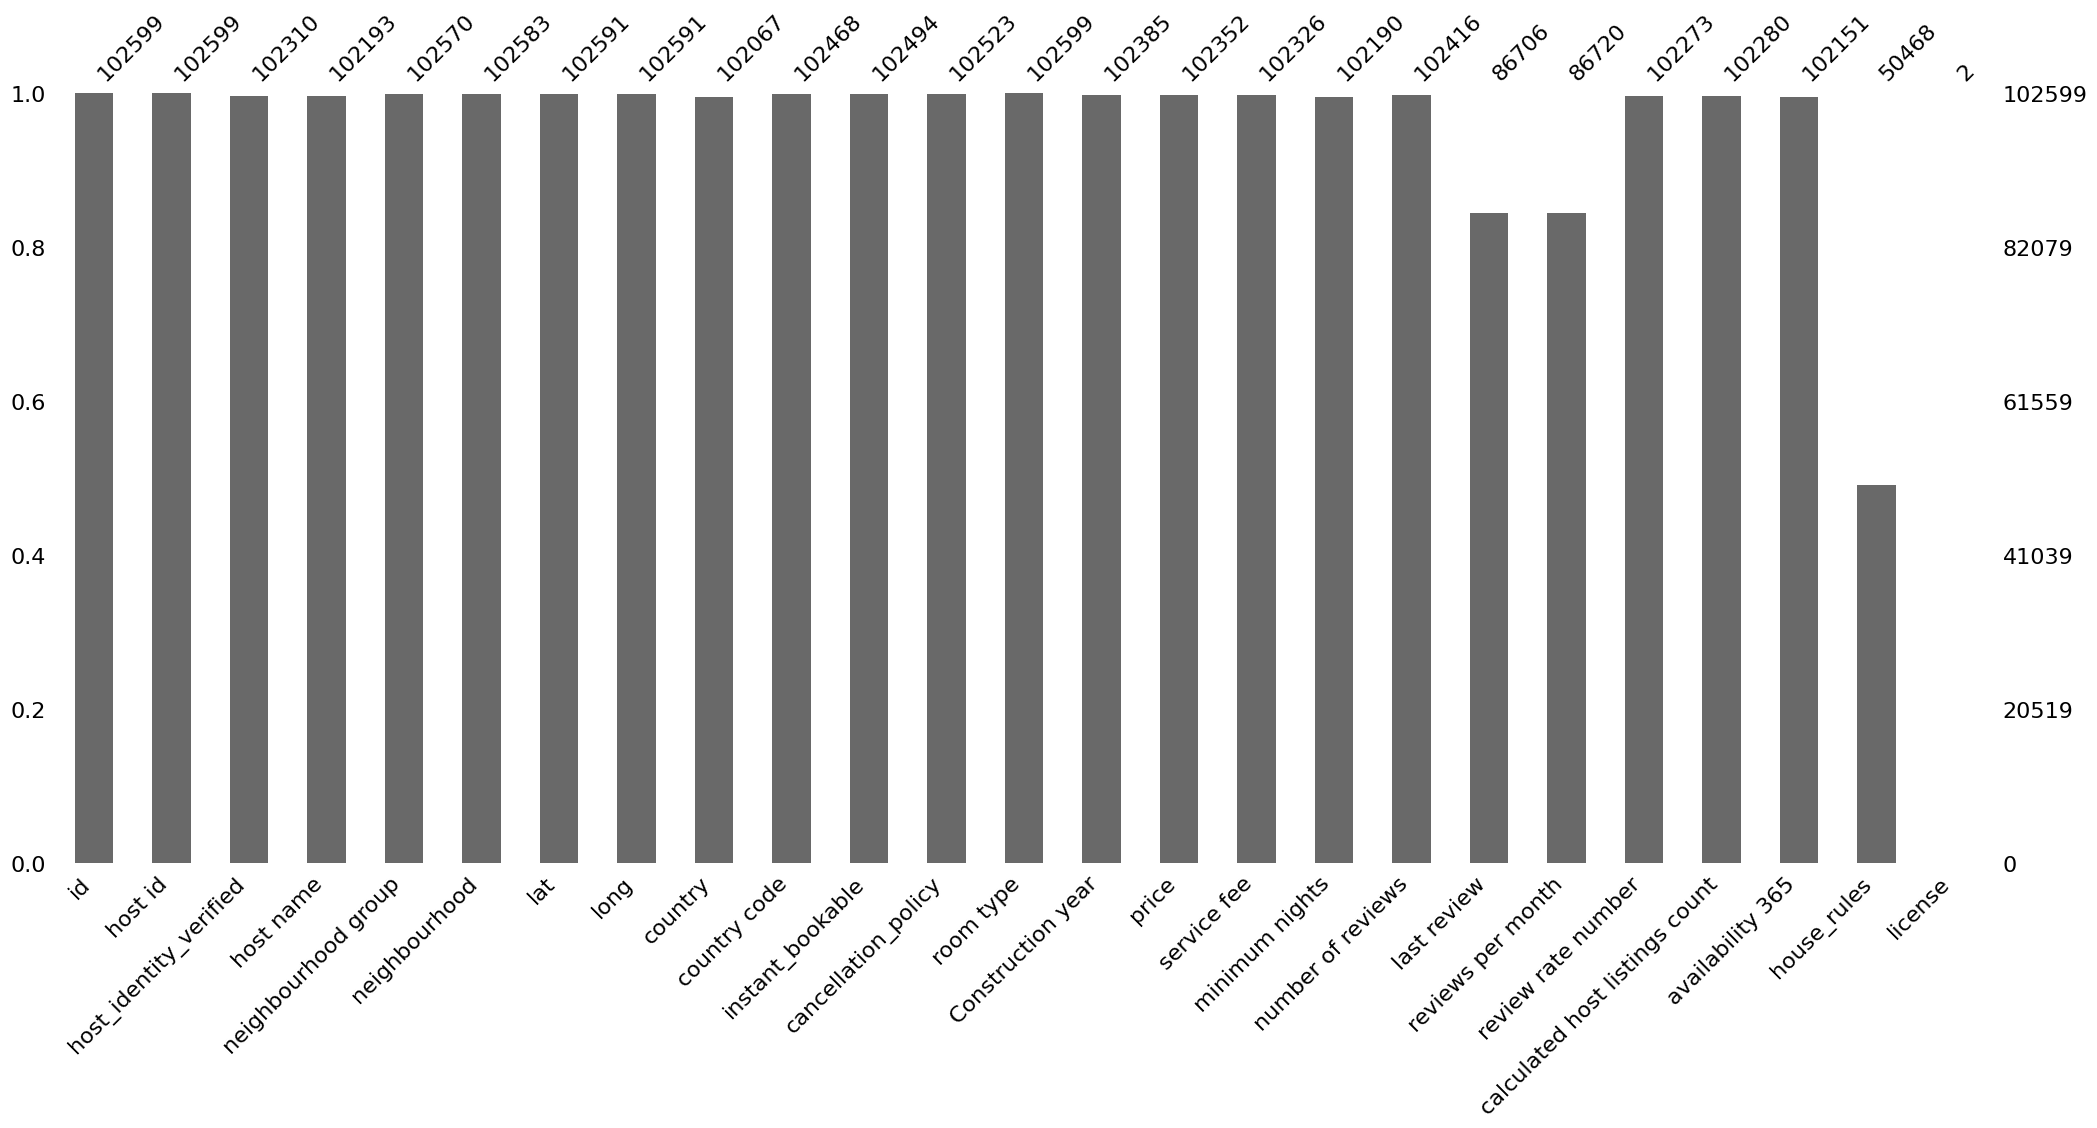

In [9]:
msno.bar(airbnb)

In [10]:
sum(airbnb["reviews per month"].isnull())

15879

In [11]:
airbnb["reviews per month"].mean()

1.374021909594096

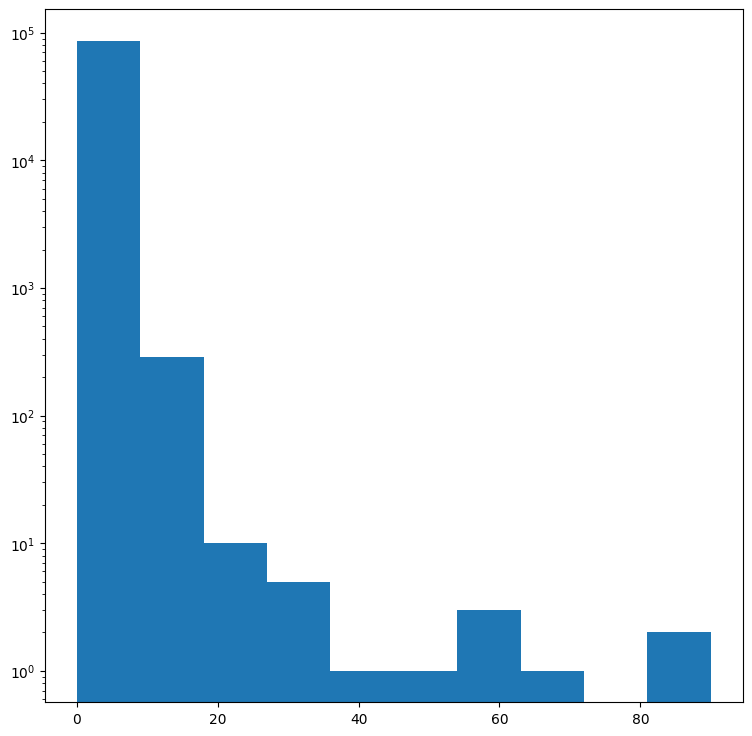

In [12]:
fig, ax = plt.subplots(figsize = (9,9))
ax.hist(airbnb["reviews per month"])
ax.set_yscale('log')

In [13]:
airbnb["reviews per month"].fillna(airbnb["reviews per month"].mean(), inplace = True)

In [14]:
sum(airbnb["reviews per month"].isnull())

0

<AxesSubplot:xlabel='room type', ylabel='count'>

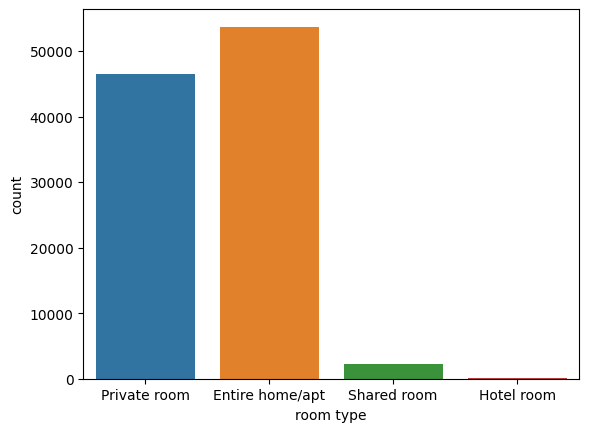

In [15]:
sns.countplot(x = "room type", data = airbnb)

In [16]:
airbnb["neighbourhood group"].value_counts()

Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

<AxesSubplot:xlabel='count', ylabel='neighbourhood group'>

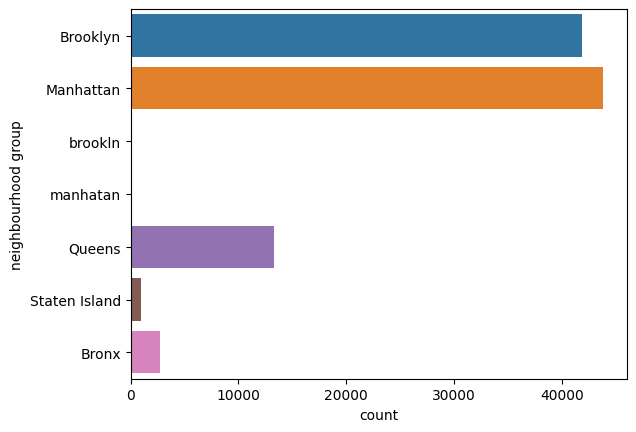

In [17]:
sns.countplot(y = "neighbourhood group", data = airbnb)